In [1]:
import numpy as np
import imageio
import math
import matplotlib.pyplot as plt
import random
import cv2


def performCorrelation(image, filt):
    x_off, y_off = math.floor(filt.shape[1]/2.0), math.floor(filt.shape[0]/2.0)
    imageCopy = image
    resultImage = np.zeros((image.shape[0] - 2* y_off, image.shape[1] - 2*x_off))
    shape = image.shape
    halfFiltX = math.floor(filt.shape[1]/2.0)
    halfFiltY = math.floor(filt.shape[0]/2.0)
    filtCopy = filt
    vectorizedFilter = filtCopy.flatten()


    for i in range(0, resultImage.shape[0]):
        for j in range(0, resultImage.shape[1]):
            subImage = imageCopy[i:i + filt.shape[0], j:j + filt.shape[1]]

            vectorizedSubImage = subImage.flatten()
            value = np.dot(vectorizedFilter, vectorizedSubImage)

            resultImage[i, j] = min(255, value)
    
    return resultImage

def addBorders(image, x, y):
    copyImage = image
    copyImage = np.vstack((np.zeros((y, copyImage.shape[1])), copyImage))
    copyImage = np.vstack((copyImage, np.zeros((y, copyImage.shape[1]))))
    copyImage = np.hstack((np.zeros((copyImage.shape[0], x)), copyImage))
    copyImage = np.hstack((copyImage, np.zeros((copyImage.shape[0], x))))
    return copyImage

def MyCorrelation(image, filt, mode):
    halfFiltX = math.floor(filt.shape[1]/2.0)
    halfFiltY = math.floor(filt.shape[0]/2.0)
    
    if mode == "valid":
        newImage = performCorrelation(image, filt)
    elif mode == "same":
        copyImage = addBorders(image, halfFiltX, halfFiltY)
        newImage = performCorrelation(copyImage, filt)
                    
    elif mode == "full":
        copyImage = addBorders(image, filt.shape[1] - 1, filt.shape[0] - 1)
        newImage = performCorrelation(copyImage, filt)
    else:        
        newImage = np.asarray([[0]])
        print("not a proper mode")
        
    return newImage
        
        
image = imageio.imread("gray.jpg")

# 5x5 gaussian kernal with sigma = 5
gaussfilter = np.asarray([[0.036894, 0.039167, 0.039956, 0.039167, 0.036894],
                [0.039167, 0.041581, 0.042418, 0.041581, 0.039167],
                [0.039956, 0.042418, 0.043272, 0.042418, 0.039956],
                [0.039167, 0.041581, 0.042418, 0.041581, 0.039167],
                [0.036894, 0.039167, 0.039956, 0.039167, 0.036894]])

sobelFilter = np.asarray([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])



gaussImageFull = MyCorrelation(image, gaussfilter, "full")
print("testing correlation full with a 5x5 gaussian filter")
print(gaussImageFull.shape)
plt.imshow(gaussImageFull, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imsave("4a_gauss_correlation_full.jpg", gaussImageFull, cmap='gray')

gaussImageSame = MyCorrelation(image, gaussfilter, "same")
print("testing correlation same with a 5x5 gaussian filter")
print(gaussImageSame.shape)
plt.imshow(gaussImageSame, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imsave("4a_gauss_correlation_same.jpg", gaussImageSame, cmap='gray')

gaussImageValid = MyCorrelation(image, gaussfilter, "valid")
print("testing correlation valid with a 5x5 gaussian filter")
print(gaussImageValid.shape)
plt.imshow(gaussImageValid, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imsave("4a_gauss_correlation_valid.jpg", gaussImageValid, cmap='gray')

sobelImage = MyCorrelation(image, sobelFilter, "full")
print("testing correlation with 3x3 sobel filter full")
print(sobelImage.shape)
plt.imshow(sobelImage, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imsave("4a_sobel_correlation_full.jpg", sobelImage, cmap='gray')

testing correlation full with a 5x5 gaussian filter
(804, 804)


testing correlation same with a 5x5 gaussian filter
(800, 800)


testing correlation valid with a 5x5 gaussian filter
(796, 796)


testing correlation with 3x3 sobel filter full
(802, 802)


testing convolution full with a 5x5 gaussian filter
(804, 804)


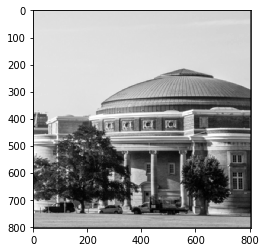

testing convolution same with a 5x5 gaussian filter
(800, 800)


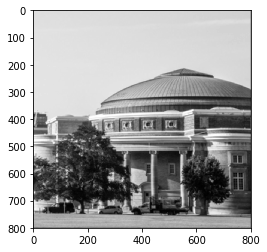

testing convolution valid with a 5x5 gaussian filter
(796, 796)


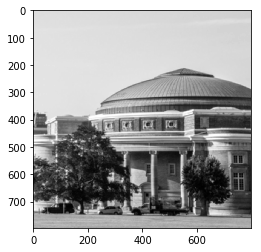

testing convolution with 3x3 sobel filter full
(802, 802)


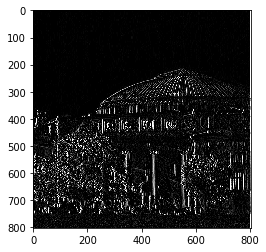

In [2]:
def MyConvolution(image, filt, mode):
    flippedFilter = filt
    flippedFilter = np.flip(flippedFilter, 0)
    flippedFilter = np.flip(flippedFilter, 1)
    
    return MyCorrelation(image, flippedFilter, mode)
        
image = imageio.imread("gray.jpg")

# 5x5 gaussian kernal with sigma = 5
filt = np.asarray([[0.036894, 0.039167, 0.039956, 0.039167, 0.036894],
                [0.039167, 0.041581, 0.042418, 0.041581, 0.039167],
                [0.039956, 0.042418, 0.043272, 0.042418, 0.039956],
                [0.039167, 0.041581, 0.042418, 0.041581, 0.039167],
                [0.036894, 0.039167, 0.039956, 0.039167, 0.036894]])




gaussImageFull = MyConvolution(image, gaussfilter, "full")
print("testing convolution full with a 5x5 gaussian filter")
print(gaussImageFull.shape)
plt.imshow(gaussImageFull, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imsave("4b_gauss_Convolution_full.jpg", gaussImageFull, cmap='gray')

gaussImageSame = MyConvolution(image, gaussfilter, "same")
print("testing convolution same with a 5x5 gaussian filter")
print(gaussImageSame.shape)
plt.imshow(gaussImageSame, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imsave("4b_gauss_Convolution_same.jpg", gaussImageSame, cmap='gray')

gaussImageValid = MyConvolution(image, gaussfilter, "valid")
print("testing convolution valid with a 5x5 gaussian filter")
print(gaussImageValid.shape)
plt.imshow(gaussImageValid, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imsave("4b_gauss_convolution_valid.jpg", gaussImageValid, cmap='gray')

sobelImage = MyConvolution(image, sobelFilter, "full")
print("testing convolution with 3x3 sobel filter full")
print(sobelImage.shape)
plt.imshow(sobelImage, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imsave("4b_sobel_convolution_full.jpg", sobelImage, cmap='gray')

the original image


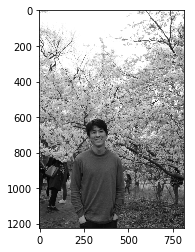

blurred the entire image with gaussian blur


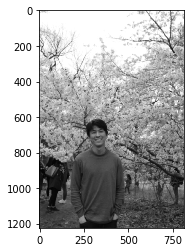

reset the foreground pixels to the original pixels using a binary mask


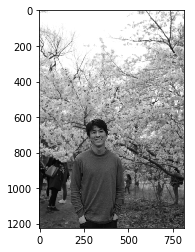

In [3]:
def unBlurForeground(orig_image, blurred_image):
    mask = imageio.imread("mask_resize.jpg", as_gray=True)
    result = blurred_image
    
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            if (mask[i, j] != 0):
                result[i, j] = orig_image[i, j]
                
    return result
    
        
image = imageio.imread("portrait_grayscale.jpg", as_gray=True)

# 5x5 gaussian kernal with sigma = 5
filt = np.asarray([[0.036894, 0.039167, 0.039956, 0.039167, 0.036894],
                [0.039167, 0.041581, 0.042418, 0.041581, 0.039167],
                [0.039956, 0.042418, 0.043272, 0.042418, 0.039956],
                [0.039167, 0.041581, 0.042418, 0.041581, 0.039167],
                [0.036894, 0.039167, 0.039956, 0.039167, 0.036894]])



print("the original image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()


print("blurred the entire image with gaussian blur")
blurredImage = MyCorrelation(image, filt, "same")
plt.imshow(blurredImage, cmap='gray', vmin=0, vmax=255)
plt.show()

print("reset the foreground pixels to the original pixels using a binary mask")
finalImage = unBlurForeground(image, blurredImage)
plt.imshow(finalImage, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imsave("4c_result.jpg", finalImage, cmap='gray')

In [4]:
def isSeparableFilter(filt):
    rank= np.linalg.matrix_rank(filt)
    
    u, sigma, v = np.linalg.svd(filt)
    np.diag(sigma)
    
    sigmaMatrix = np.sqrt(sigma)
    
    u = np.multiply(sigmaMatrix[0], u[:, 0])
    v = np.multiply(sigmaMatrix[0], v[0])
    
    if rank == 1:
        print(u)
        print(v)
    
        print("outer product of the two vectors")
        print(np.outer(u, v.T))
        print("we get the original filter")
    
    return rank == 1


gaussFilter = np.asarray([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 9.0
print(isSeparableFilter(gaussFilter))

sobelFilter = np.asarray([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
print(isSeparableFilter(sobelFilter))

[-0.33333333 -0.66666667 -0.33333333]
[-0.33333333 -0.66666667 -0.33333333]
outer product of the two vectors
[[0.11111111 0.22222222 0.11111111]
 [0.22222222 0.44444444 0.22222222]
 [0.11111111 0.22222222 0.11111111]]
we get the original filter
True
[-0.75983569 -1.51967137 -0.75983569]
[ 1.31607401  0.         -1.31607401]
outer product of the two vectors
[[-1. -0.  1.]
 [-2. -0.  2.]
 [-1. -0.  1.]]
we get the original filter
True


Adding uniform random noise with a range of +- 0.05 to the image


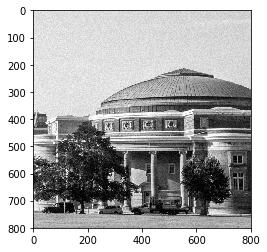

In [5]:
def AddRandNoise(image, m):
    copyImage = image / 255.0

    out = np.random.uniform(-m, m, (copyImage.shape[0], copyImage.shape[1]))
    copyImage = np.clip(copyImage + out, 0, 1)
    
    return copyImage
    
print("Adding uniform random noise with a range of +- 0.05 to the image")
image = imageio.imread("gray.jpg")
image = AddRandNoise(image, 0.05)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.show()
plt.imsave("6a_random_noise.jpg", image, cmap='gray')

random uniform noise


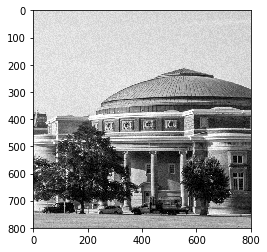

removing random uniform noise with a mean 3x3 filter


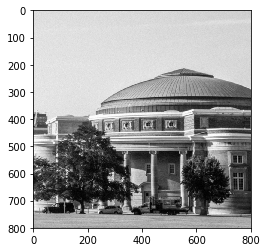

In [6]:
def AddRandNoise(image, m):
    copyImage = image / 255.0

    out = np.random.uniform(-m, m, (copyImage.shape[0], copyImage.shape[1]))
    copyImage = np.clip(copyImage + out, 0, 1)
    
    return copyImage


def removeNoise(image):
    copyImage = image
    filt = np.asarray([[1, 1, 1], 
                       [1, 1, 1], 
                       [1, 1, 1]]) / 9.0
    copyImage = MyCorrelation(copyImage, filt, "same")
    return copyImage
    

image = imageio.imread("gray.jpg")
image = AddRandNoise(image, 0.05)

print("random uniform noise")
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.show()

image = removeNoise(image)
print("removing random uniform noise with a mean 3x3 filter")
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.show()
plt.imsave("6b_denoise.jpg", image, cmap='gray')

added salt and pepper noise to the grayscale image


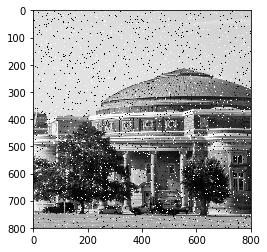

In [7]:
def AddSaltAndPepperNoise(image, d):
    copyImage = image
    numPixels = copyImage.shape[0] * copyImage.shape[1]
    numNoise = numPixels * d
        
    
    for i in range(0, copyImage.shape[0]):
        for j in range(0, copyImage.shape[1]):
            randNum = random.randint(0, numPixels)
            
            if randNum < numNoise:
                
                copyImage[i, j] = random.randint(0, 1) * 255
                
    return copyImage

print("added salt and pepper noise to the grayscale image")
image = imageio.imread("gray.jpg")
image = AddSaltAndPepperNoise(image, 0.05)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imsave("6c_salt_and_pepper_gray.jpg", image, cmap='gray')

Salt and pepper noise


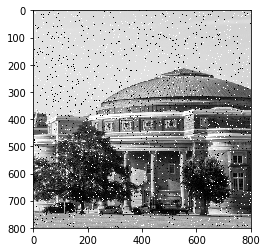

noise removal with the mean filter from question 6b


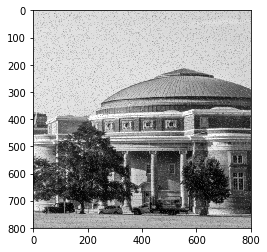

noise removal with the gaussian filter


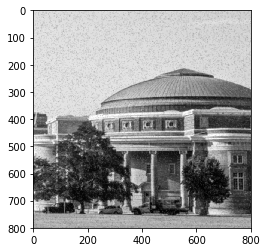

noise removal with the median filter


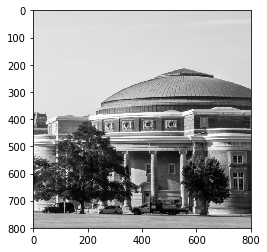

In [8]:
image = imageio.imread("gray.jpg")
image = image

print("Salt and pepper noise")
noisyimage = AddSaltAndPepperNoise(image, 0.05)
plt.imshow(noisyimage, cmap='gray', vmin=0, vmax=255)
plt.show()

print("noise removal with the mean filter from question 6b")
averageimage = removeNoise(noisyimage)
plt.imshow(averageimage, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imsave("6d_salt_and_pepper_denoise_mean.jpg", averageimage, cmap='gray')

print("noise removal with the gaussian filter")
gaussianimage = cv2.GaussianBlur(noisyimage,(5, 5), 2)
plt.imshow(gaussianimage, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imsave("6d_salt_and_pepper_denoise_gaussian.jpg", gaussianimage, cmap='gray')

print("noise removal with the median filter")
medianimage = cv2.medianBlur(noisyimage, 3)
plt.imshow(medianimage, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imsave("6d_salt_and_pepper_denoise_median.jpg", medianimage, cmap='gray')

salt and pepper noise of 5% of the pixels on each channel


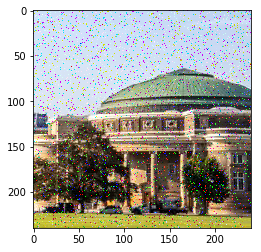

applied the median blur to each channel


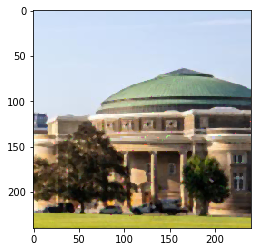

applied a second median blur to each channel


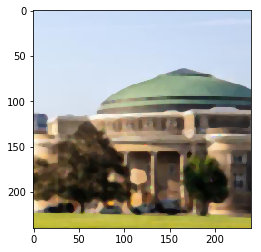

applied a 7x7 sigma=9 gaussian blur to the resulting median filtered image


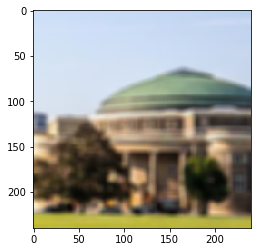

applied a 7x7 bilateral to the resulting median filtered image


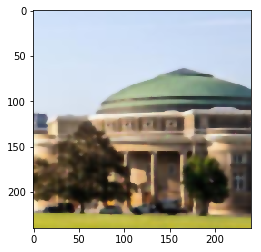

In [9]:
image = imageio.imread("color.jpg")

r, g, b = cv2.split(image)

r = AddSaltAndPepperNoise(r, 0.05)
g = AddSaltAndPepperNoise(g, 0.05)
b = AddSaltAndPepperNoise(b, 0.05)

noisyimage = cv2.merge((r, g, b))

print("salt and pepper noise of 5% of the pixels on each channel")
plt.imshow(noisyimage, vmin=0, vmax=255)
plt.show()
plt.imsave("6e_noise.jpg", noisyimage)

print("applied the median blur to each channel")
medianimage = cv2.medianBlur(noisyimage, 3)
plt.imshow(medianimage, vmin=0, vmax=255)
plt.show()
plt.imsave("6e_medianblur.jpg", medianimage, vmin=0, vmax=255)

print("applied a second median blur to each channel")
medianimage2 = cv2.medianBlur(medianimage, 5)
plt.imshow(medianimage2, vmin=0, vmax=255)
plt.show()
plt.imsave("6e_medianblur_2x.jpg", medianimage2, vmin=0, vmax=255)

print("applied a 7x7 sigma=9 gaussian blur to the resulting median filtered image")
gaussianimage = cv2.GaussianBlur(medianimage, (7, 7), 9)
plt.imshow(gaussianimage, vmin=0, vmax=255)
plt.show()
plt.imsave("6e_median_gaussian_blur.jpg", gaussianimage, vmin=0, vmax=255)

print("applied a 7x7 bilateral to the resulting median filtered image")
bilateral = cv2.bilateralFilter(medianimage, 7, 155, 155)
plt.imshow(bilateral, vmin=0, vmax=255)
plt.show()
plt.imsave("6e_median_bilateral_blur.jpg", bilateral, vmin=0, vmax=255)